In [39]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [21]:
airlines = pd.read_csv("EastWestAirlines.csv")

In [22]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [23]:
airlines.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [24]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [25]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(airlines.iloc[:,1:])

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
std_scaler=StandardScaler()

In [28]:
std_airlines_df=std_scaler.fit_transform(airlines)

In [29]:
std_airlines_df

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [30]:
airlines.shape

(3999, 12)

### As the shape of the dataset is huge, hence hierarchial clustering will not be suitable. Need to perform KMeans and DBSCAN

# KMeans Clustering

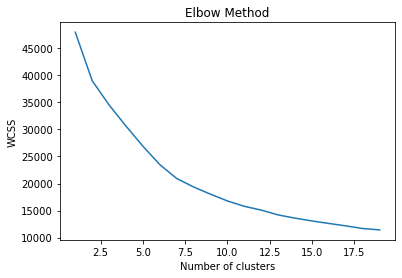

In [104]:
wcss=[]
for i in range(1,20):
    kMeans=KMeans(n_clusters=i,random_state=0)
    kMeans.fit(std_airlines_df)
    wcss.append(kMeans.inertia_)
    
plt.plot(range(1, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [32]:
cluster_new=KMeans(7,random_state=42)
cluster_new.fit(std_airlines_df)

KMeans(n_clusters=7, random_state=42)

In [33]:
cluster_new.labels_

array([4, 4, 4, ..., 1, 1, 1])

In [34]:
airlines1=airlines.copy()

In [37]:
airlines1['CLusterId']=cluster_new.labels_
airlines1
# There are 7 clusters formed

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,CLusterId
0,1,28143,0,1,1,1,174,1,0,0,7000,0,4
1,2,19244,0,1,1,1,215,2,0,0,6968,0,4
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,4
3,4,14776,0,1,1,1,500,1,0,0,6952,0,4
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [36]:
airlines1.groupby('CLusterId').agg(['mean']).reset_index()

,CLusterId,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2083.603448,118527.293103,5486.241379,2.051724,1.000000,1.000000,19386.500000,12.500000,980.724138,2.913793,3928.534483,0.551724
1,1,3137.086694,39630.920027,39.112231,1.373656,1.000000,1.000000,6023.544355,7.656586,218.114919,0.642473,2145.469086,0.199597
2,2,1548.853877,125476.972167,58.794235,3.935388,1.000000,1.001988,44364.386680,19.369781,376.470179,1.138171,4954.287276,0.699801
3,3,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
4,4,1092.781028,56980.206324,57.035573,1.355731,1.000000,1.000791,5728.110672,7.836364,238.442688,0.725692,5715.283794,0.251383
5,5,1656.112903,202773.451613,535.758065,2.403226,1.000000,1.000000,36754.637097,29.870968,6010.596774,17.629032,4807.153226,0.846774
6,6,2269.372093,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349


# DBSCAN Clustering

In [94]:
dbscan=DBSCAN(eps=0.73,min_samples=12)
dbscan.fit(std_airlines_df)

DBSCAN(eps=0.73, min_samples=12)

In [95]:
dbscan.labels_

array([ 0,  0,  0, ..., -1,  0,  0], dtype=int64)

In [100]:
pd.Series(dbscan.labels_).value_counts()

 0    1614
-1    1299
 1     297
 3     263
 2     186
 5     156
 4     117
 6      53
 7      14
dtype: int64

In [101]:
airlines2=airlines.copy()

In [103]:
airlines2['New_Cluster']=dbscan.labels_
airlines2
#There are 8 clusters

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,New_Cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,-1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [99]:
airlines2.groupby('New_Cluster').agg(['mean']).reset_index()

,New_Cluster,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,1770.565050,138735.950731,442.889915,2.759045,1.04465,1.037721,33383.050808,18.404157,1253.633564,3.662818,4628.778291,0.596613
1,0,2335.042751,31694.342007,0.309789,1.078067,1.00000,1.000000,2583.644981,5.565056,66.904585,0.239157,3517.429988,0.000000
2,1,2021.555556,33663.481481,1.683502,1.000000,1.00000,1.000000,4023.124579,5.060606,160.932660,0.555556,4066.353535,1.000000
3,2,1852.435484,43217.231183,0.000000,3.000000,1.00000,1.000000,18846.655914,15.424731,66.129032,0.247312,4447.956989,1.000000
4,3,1942.334601,78382.669202,0.000000,3.000000,1.00000,1.000000,18311.285171,14.676806,41.806084,0.148289,4150.125475,0.000000
5,4,1427.863248,98457.102564,0.000000,4.000000,1.00000,1.000000,36120.709402,15.444444,70.940171,0.196581,5107.888889,0.000000
6,5,1591.288462,61837.275641,0.000000,4.000000,1.00000,1.000000,38001.647436,16.141026,126.705128,0.397436,4843.576923,1.000000
7,6,1934.679245,36073.867925,0.000000,2.000000,1.00000,1.000000,9746.641509,13.849057,55.679245,0.188679,4180.094340,1.000000
8,7,1065.142857,87852.071429,0.000000,5.000000,1.00000,1.000000,60034.857143,15.428571,85.714286,0.285714,5637.714286,1.000000
